# Data import

In [1]:
import pandas as pd
import seaborn as sns

In [1]:

file_path = "./finefoods.txt"

f = open(file_path, 'r', errors='ignore')

records = []
record = {}

for line in f:

   if "product/productId:" in line:
       record["productId"] = line.replace('product/productId: ','')[:-1]
   elif "review/userId:" in line:
       record["userId"] = line.replace('review/userId: ','')[:-1]
   elif "review/profileName: " in line:
       record["profileName"] = line.replace('review/profileName: ','')[:-1]
   elif "review/helpfulness: " in line:
       record["helpfulness"] = line.replace('review/helpfulness: ','')[:-1]
   elif "review/score: " in line:
       record["score"] = line.replace('review/score: ','')[:-1]
   elif "review/time: " in line:
       record["time"] = int(line.replace('review/time: ','')[:-1])
   elif "review/summary: " in line:
       record["summary"] = line.replace('review/summary: ','')[:-1]
   elif "review/text: " in line:
       record["text"] = line.replace('review/text: ','')[:-1]
   elif line == "\n":
        if len(record) != 8:
            print("Missing keys: ", record.keys())
        else:
            records.append(record)
        record = {}
   else:
       print("Unkonwn key word: ", line)


df = pd.DataFrame(records)
df.to_pickle(path="./finefood_dataset.pkl")

df.info()

ValueError: invalid literal for int() with base 10: '5.0'

In [3]:
df.head()

,helpfulness,productId,profileName,score,summary,text,time,userId
0,1/1,B001E4KFG0,delmartian,5.0,Good Quality Dog Food,I have bought several of the Vitality canned d...,1303862400,A3SGXH7AUHU8GW
1,0/0,B00813GRG4,dll pa,1.0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1346976000,A1D87F6ZCVE5NK
2,1/1,B000LQOCH0,"Natalia Corres ""Natalia Corres""",4.0,"""Delight"" says it all",This is a confection that has been around a fe...,1219017600,ABXLMWJIXXAIN
3,3/3,B000UA0QIQ,Karl,2.0,Cough Medicine,If you are looking for the secret ingredient i...,1307923200,A395BORC6FGVXV
4,0/0,B006K2ZZ7K,"Michael D. Bigham ""M. Wassir""",5.0,Great taffy,Great taffy at a great price. There was a wid...,1350777600,A1UQRSCLF8GW1T


In [4]:
# Retype score to category
df['score'] = df['score'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 8 columns):
helpfulness    568454 non-null object
productId      568454 non-null object
profileName    568454 non-null object
score          568454 non-null category
summary        568454 non-null object
text           568454 non-null object
time           568454 non-null int64
userId         568454 non-null object
dtypes: category(1), int64(1), object(6)
memory usage: 30.9+ MB


## Explanatory analysis

#### Unique counts

More userID than profileNames => more userID links to the same profileName

In [5]:
df.nunique()

helpfulness      1571
productId       74258
profileName    218413
score               5
summary        295744
text           393579
time             3168
userId         256059
dtype: int64

In [6]:
df['text'].value_counts()

This review will make me sound really stupid, but whatever. I don't really care as long as people find out what's real and can avoid my mistakes.<br /><br />I got my wonderful little sweet Bella Bean when she was a few days shy of three years old. She had been bounced around from house to house and eating whatever was cheap. I have had cats around me my entire life, for about twenty-five years now. My mother always just fed them whatever, the kinds of food you buy in the supermarket - Friskies, Nine Lives, Kit & Kaboodle, stuff like that. And our cats were always fine, at least in terms of their eating habits. They would eat in the morning, stop when they were done, come back, and eat some more when they got hungry.<br /><br />My housemate at the time was working for Hill's and assured me that this was the best food ever made, so great, so on and so forth. I now know that she is an utter buffoon, but I initially trusted her judgment, which is so unfortunate because she doesn't think. S

In [ ]:
df[df['userId'] == 'A3OXHLG6DIBRW8']

#### Score distribution

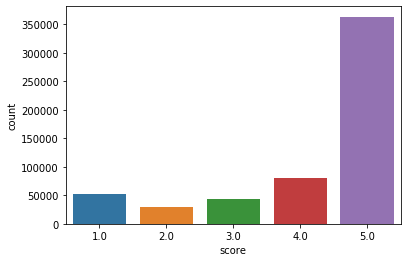

In [11]:
sns.countplot(df.score)